# Bloque 01 - Unidad 04 - Curadoría y normalización de datos

*El notebook parece corto, pero arreglar datos mal cargados es una tarea larga*

**// Observación: todo texto escrito en negrita entre  barras (//), son acotaciones mias. El resto es propio del colab de la clase.//**

## Rescalado y normalización

El rescalado y la normalización de datos implica ajustar los valores de medición de diferentes escalas a una escala y/o distribución común. **//Quiero poder comparar y para eso necesito mismas unidades o cosas adimensionales//**.  veremos es recomendable realizarlos, especialmente cuando se utilizan como variables de entrada para algoritmos de aprendizaje automático ya que así se asigna el mismo peso a todas las variables, eliminando el impacto de los valores atípicos en los resultados de entrenamiento del modelo. **//Preguntar//**

Existen una gran variedad de métodos, entre los mas comunes están:
- Single feature scaling
- Min-max scaling ***//este lo vimos en la clase.Su principal problema es que es muy sensible a outliers//***
- score normalization
- Log scaling
- Clipping

Para cada una de estos métodos:
1. Buscá para que se usan y que significan matememáticamente
2. Escribí una función de Python
3. Cargá el dataset de pinguinos, aplica la normalización a alguna de las columnas y grafica los valores antes y después.


In [88]:
import seaborn as sns
import seaborn.objects as so
import matplotlib as mpl
import numpy as np
import pandas as pd
penguins = sns.load_dataset("penguins")
!pip install cinemagoer

***Single Feature Scaling***

In [89]:
def singleFeatureScaling(data): #la idea es dividir por algo comun. Podria ser el maximo u otra cosa. En este caso trabajamos con la norma.
  for elem in data:
    elem = elem / np.abs(elem)
  return data #revisar

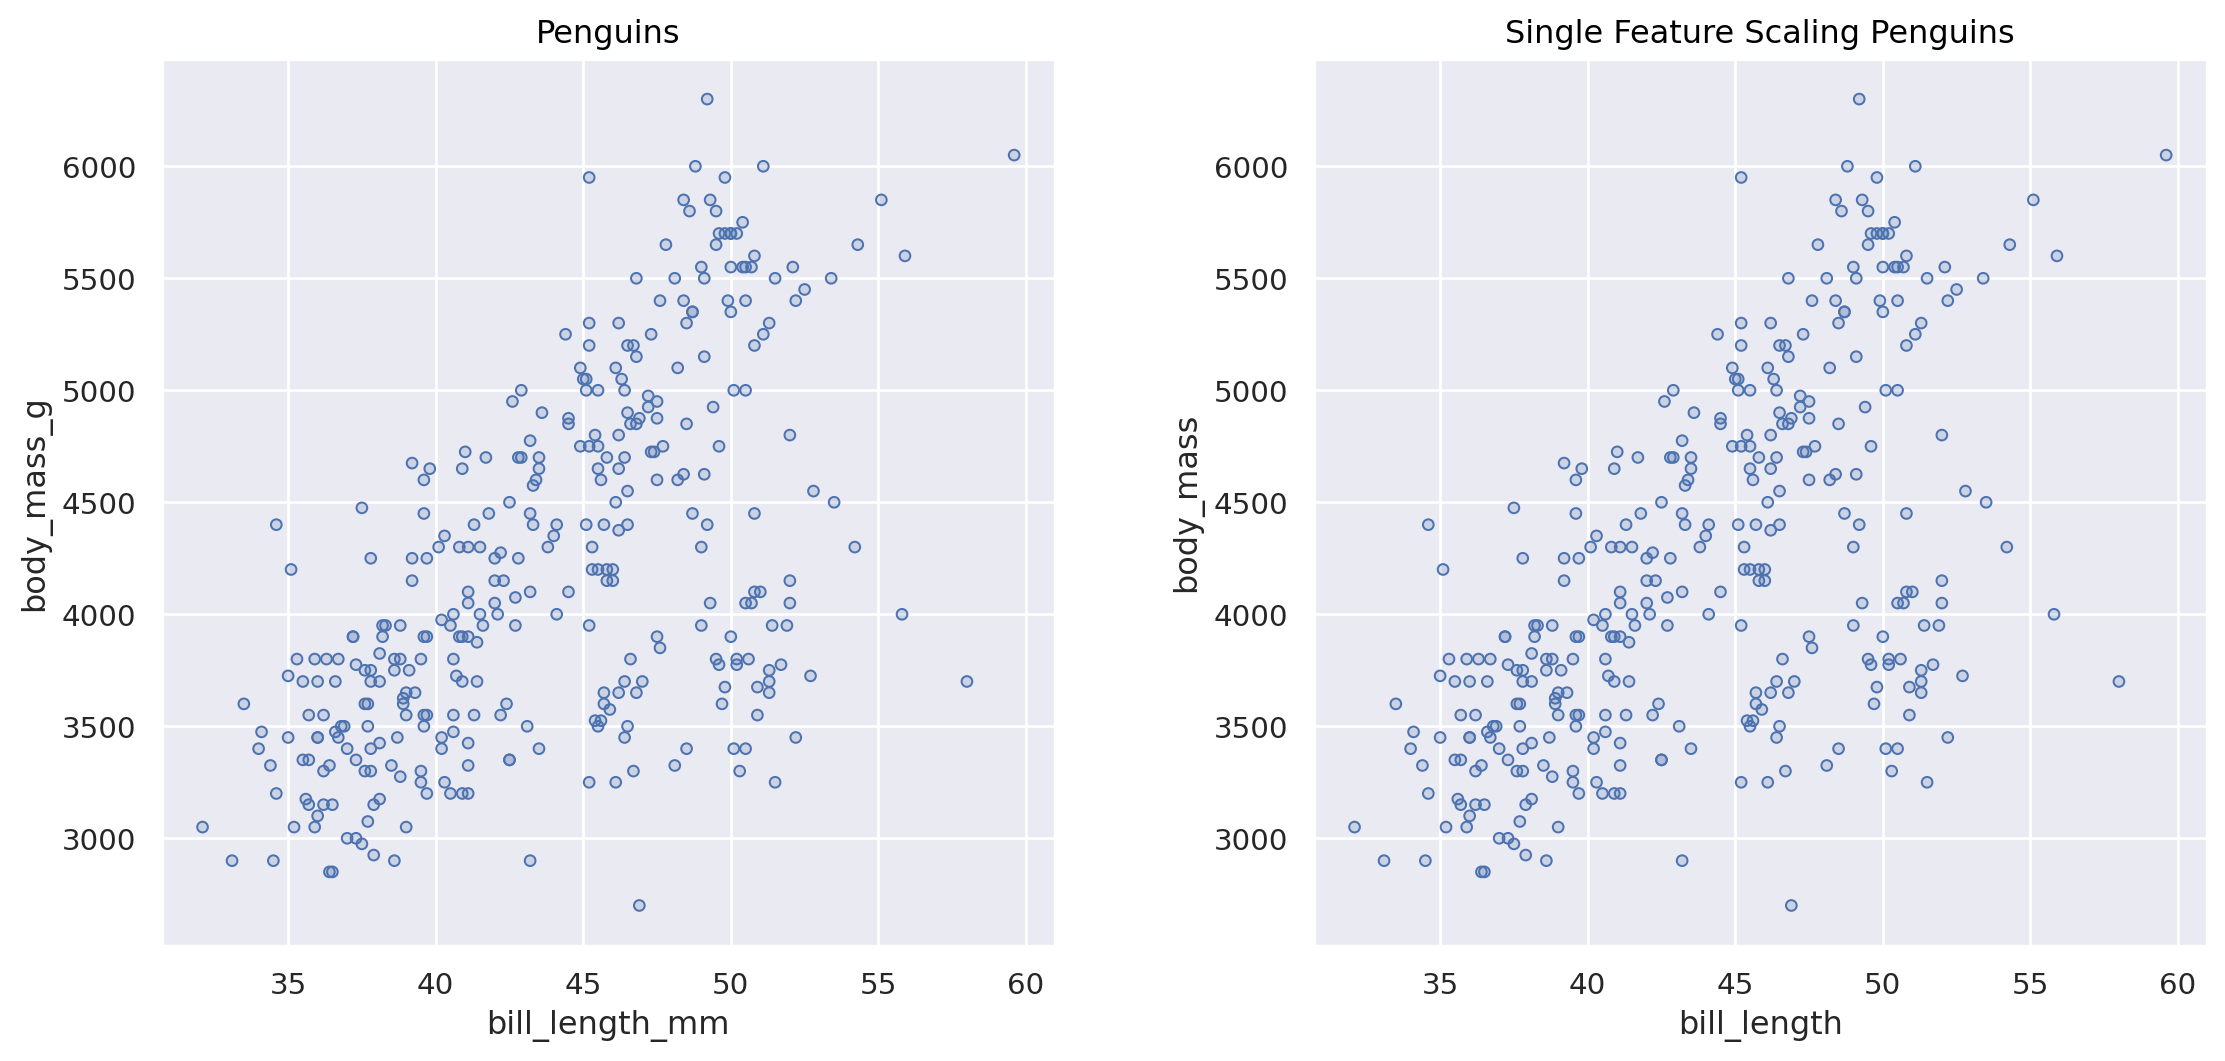

In [90]:
f = mpl.figure.Figure(figsize=(12, 6))
sf1, sf2 = f.subfigures(1, 2)
(
    so.Plot(penguins, x="bill_length_mm", y="body_mass_g")
    .add(so.Dots())
    .on(sf1)
    .label(title="Penguins")
    .plot()
)
(
    so.Plot(penguins, x=singleFeatureScaling(penguins.bill_length_mm), y=singleFeatureScaling(penguins.body_mass_g))
    .add(so.Dots())
    .on(sf2)
    .label(x="bill_length", y="body_mass",title="Single Feature Scaling Penguins")
    .plot()

)

***Min-max scaling***

In [91]:
def minMaxScaling(data):
  return (data - data.min()) / (data.max() - data.min())

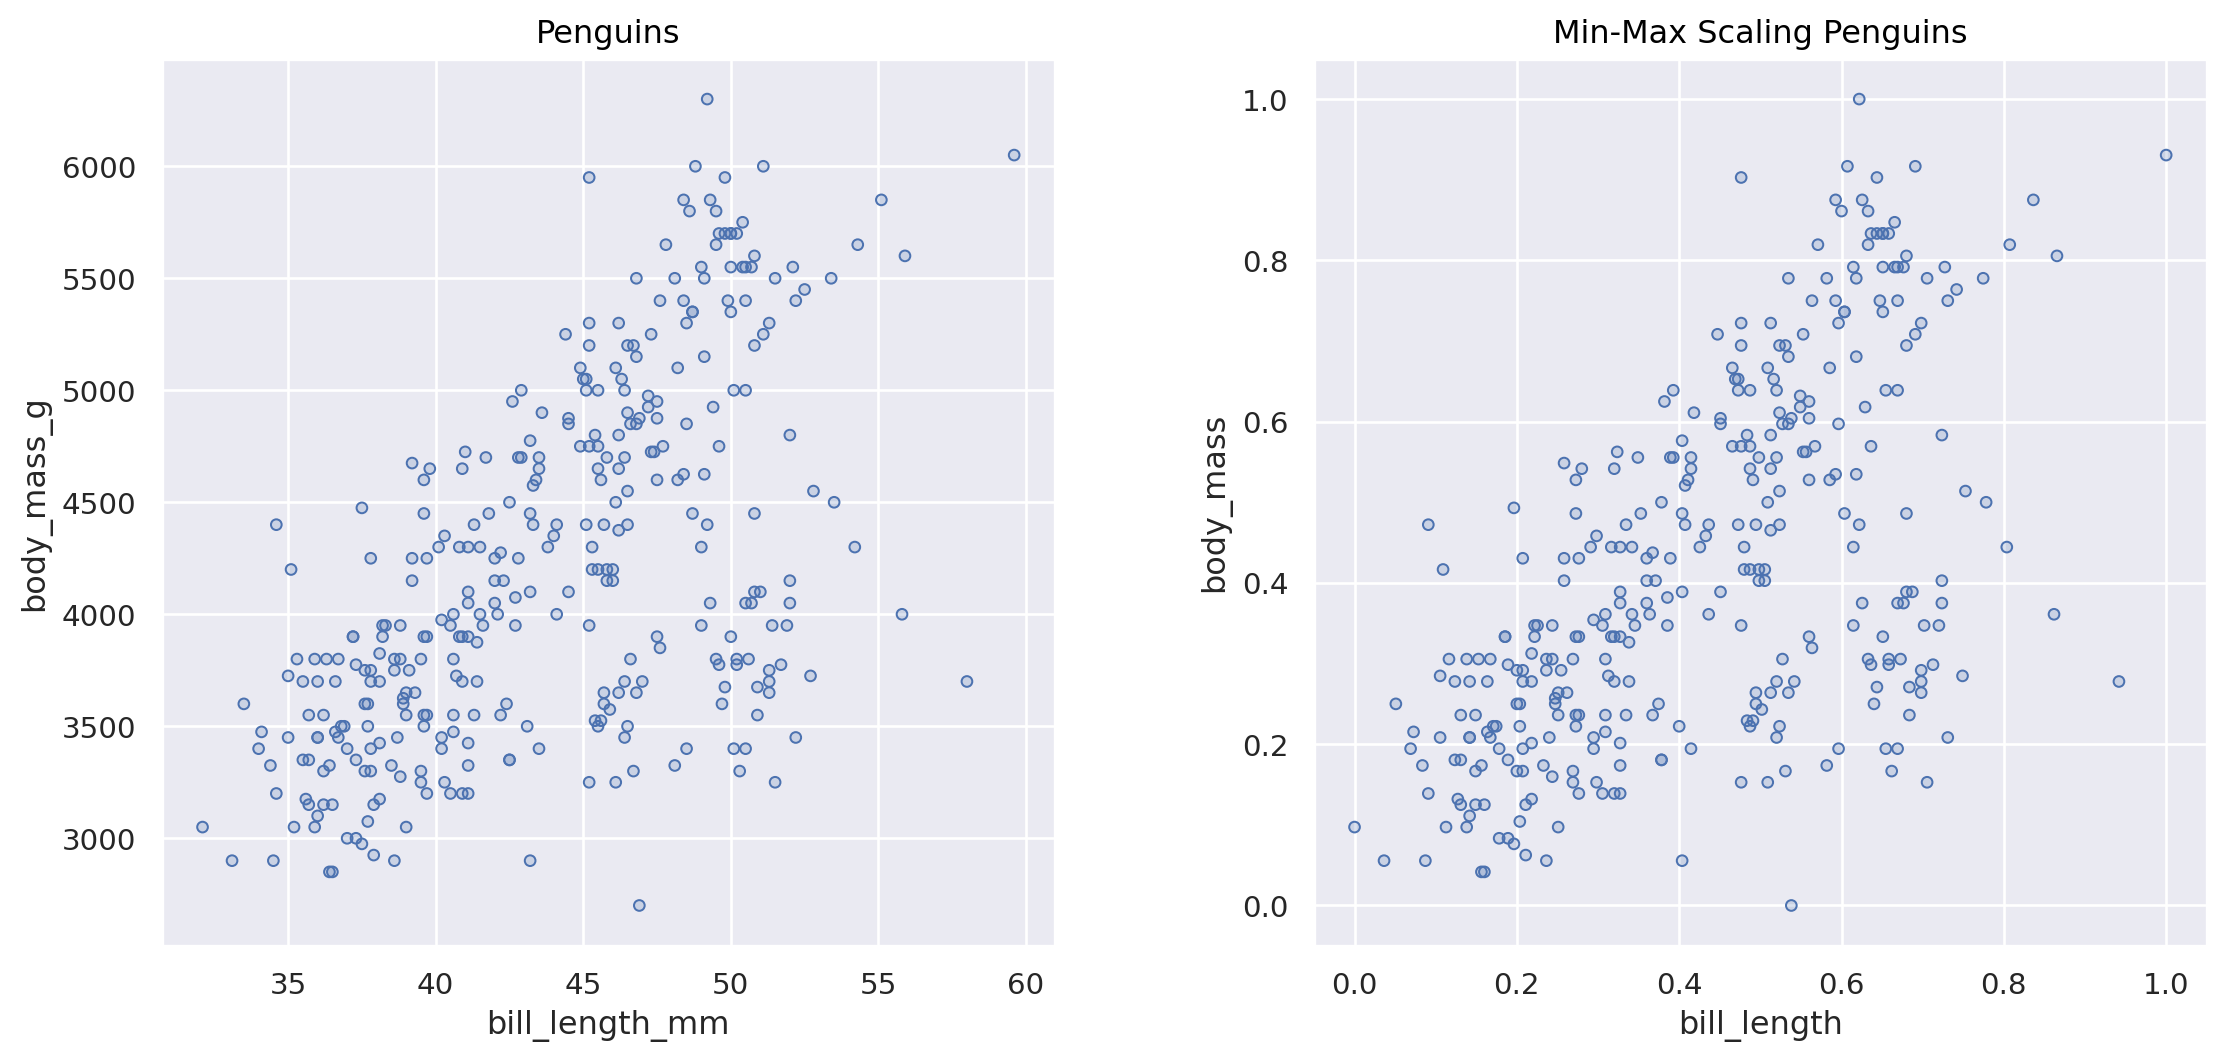

In [92]:
f = mpl.figure.Figure(figsize=(12, 6))
sf1, sf2 = f.subfigures(1, 2)
(
    so.Plot(penguins, x="bill_length_mm", y="body_mass_g")
    .add(so.Dots())
    .on(sf1)
    .label(title="Penguins")
    .plot()
)
(
    so.Plot(penguins, x=(minMaxScaling(penguins.bill_length_mm)), y=minMaxScaling(penguins.body_mass_g  ))
    .add(so.Dots())
    .on(sf2)
    .label(x="bill_length", y="body_mass",title="Min-Max Scaling Penguins")
    .plot()

)


***Score Normalization***

In [93]:
def scoreNormalization(data):
  return (data - data.mean()) / data.std()

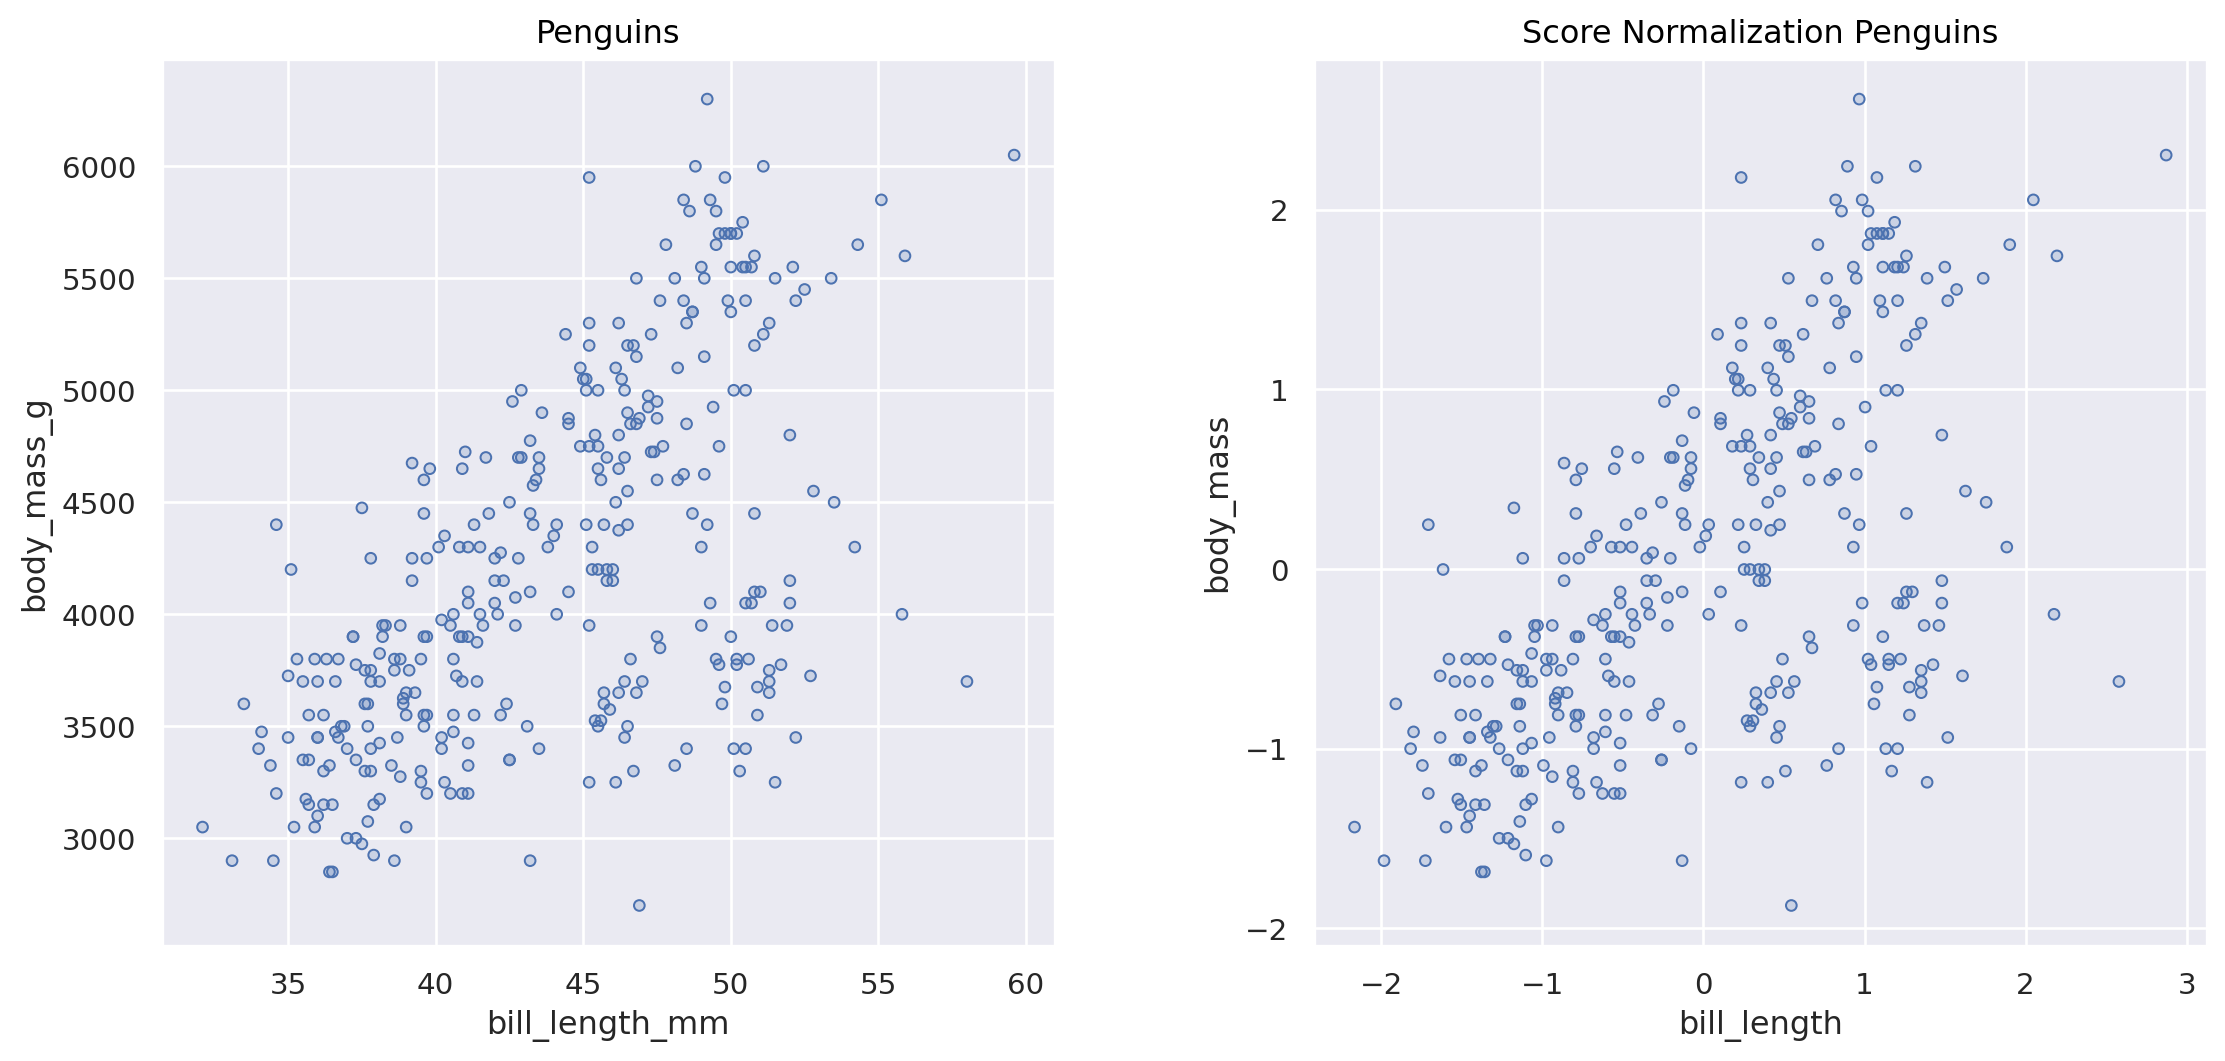

In [94]:
f = mpl.figure.Figure(figsize=(12, 6))
sf1, sf2 = f.subfigures(1, 2)
(
    so.Plot(penguins, x="bill_length_mm", y="body_mass_g")
    .add(so.Dots())
    .on(sf1)
    .label(title="Penguins")
    .plot()
)
(
    so.Plot(penguins, x=(scoreNormalization(penguins.bill_length_mm)), y=scoreNormalization(penguins.body_mass_g  ))
    .add(so.Dots())
    .on(sf2)
    .label(x="bill_length", y="body_mass",title="Score Normalization Penguins")
    .plot()

)


***Log Scaling***

In [95]:
def logScaling(data):
  return np.log(data)

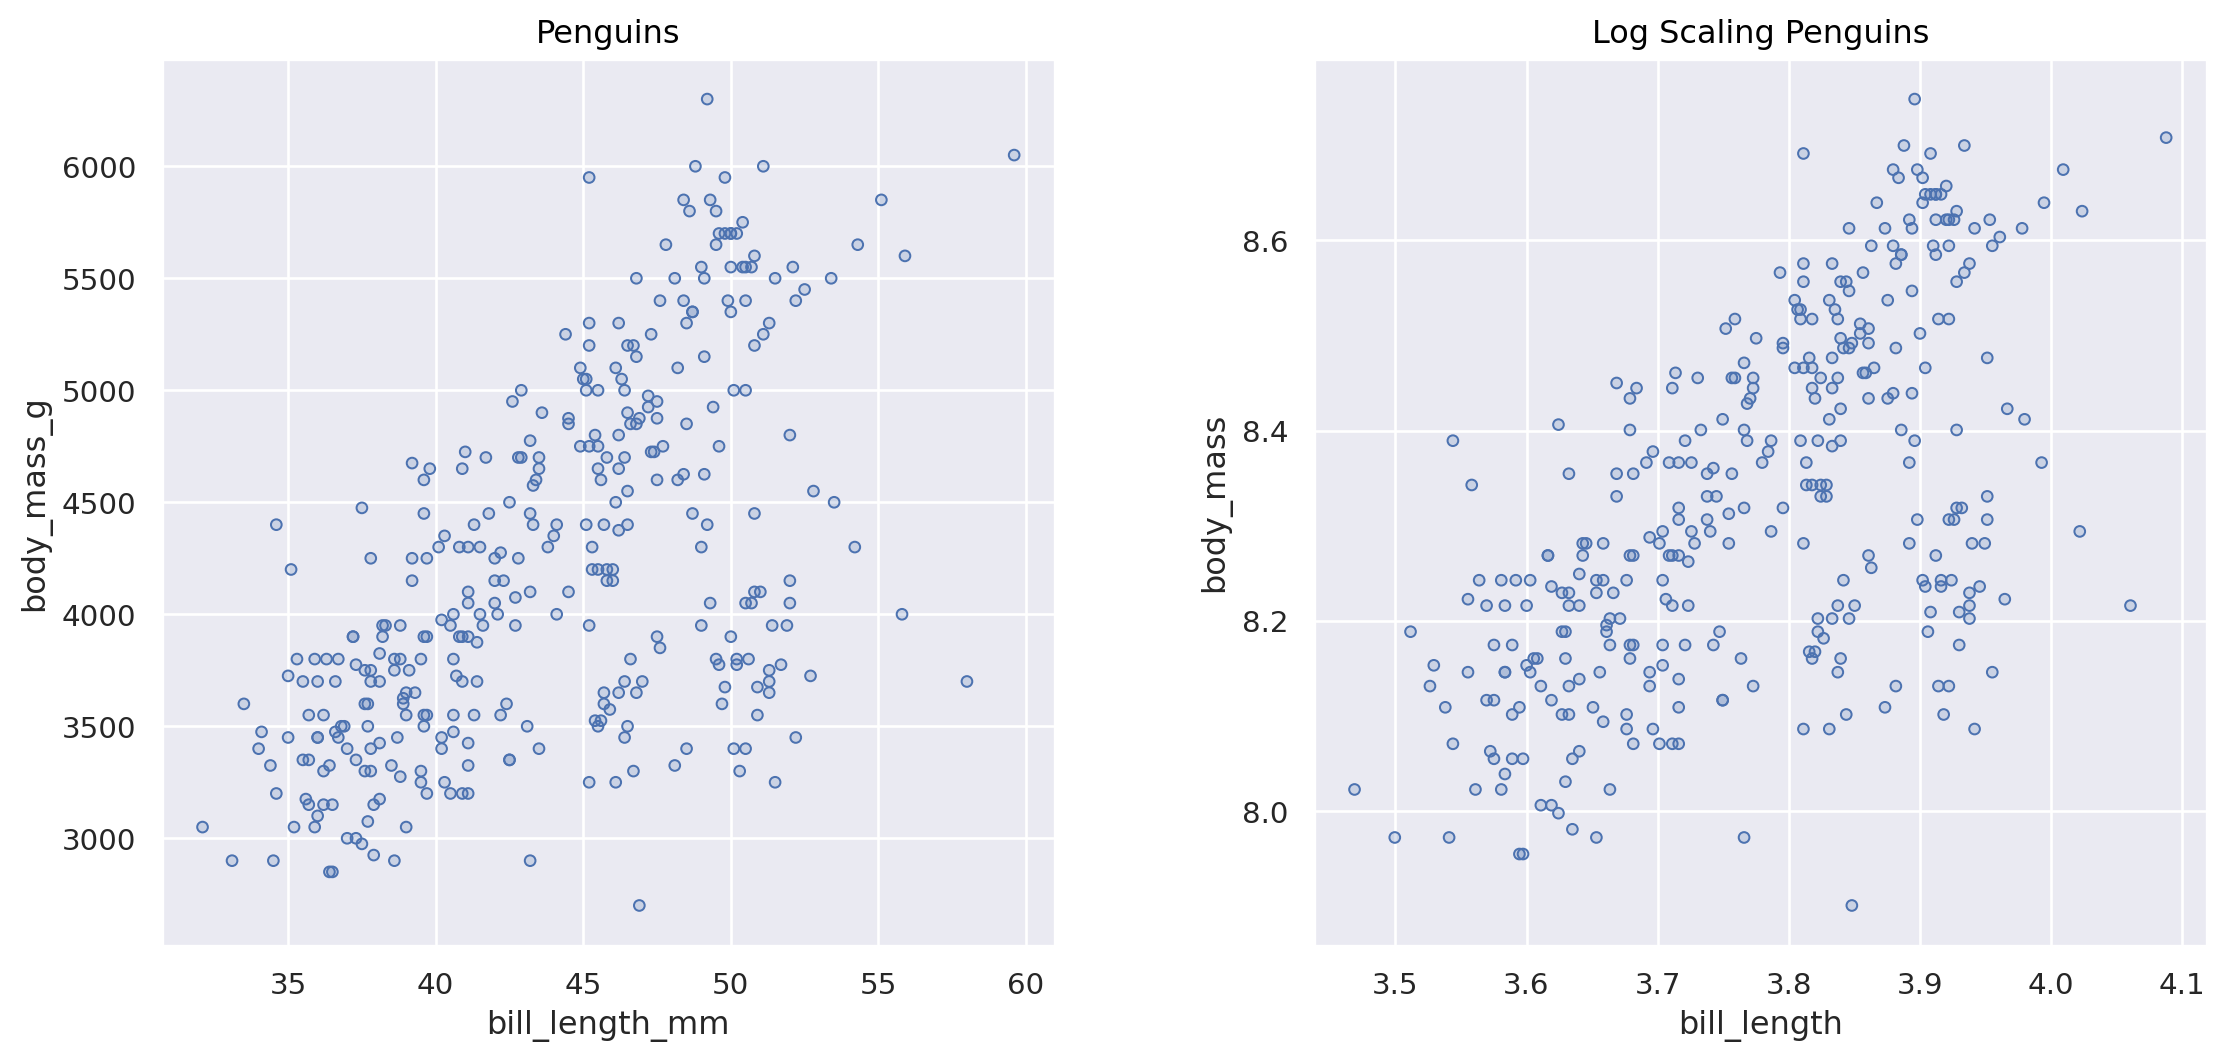

In [96]:
f = mpl.figure.Figure(figsize=(12, 6))
sf1, sf2 = f.subfigures(1, 2)
(
    so.Plot(penguins, x="bill_length_mm", y="body_mass_g")
    .add(so.Dots())
    .on(sf1)
    .label(title="Penguins")
    .plot()
)
(
    so.Plot(penguins, x=(logScaling(penguins.bill_length_mm)), y=logScaling(penguins.body_mass_g  ))
    .add(so.Dots())
    .on(sf2)
    .label(x="bill_length", y="body_mass",title="Log Scaling Penguins")
    .plot()
)
#Aca en la escala normalizada no perdi info en el orden de los ejes. EL eje y sigue "siendo más grande" que el x.El plot no cambia sustancialmente ya que mis datos naturalmente tienen una distribucipon uniforme
#a los largo de mis dos ejes, de alguna manera. (revisar argumento)


## Curadoría

La curaduría de datos es fundamental, ya que garantizan la calidad y consistencia de la información utilizada para el análisis. Si los datos de entrada son de mala calidad, los resultados serán de mala calidad. La curaduría implica seleccionar, limpiar y organizar los datos, eliminando errores, duplicados o inconsistencias que puedan distorsionar los resultados.Sin estos procesos, los modelos predictivos y análisis estadísticos pueden producir conclusiones erróneas, afectando la toma de decisiones basadas en datos confiables y precisos.

En el campus hay dos datasets fáciles de cargar, pero con dificiles de usar ya que los datos fueron tomados de la web sin ningún tipo de supervisión. Estos son:
- audible.csv
- netflix.csv

Para cada uno de estos archivo:
1. Importalos a un dataframe de pandas.
2. Hace una descripción de las columnas.
3. Inspeccioná los valores a ojo.
4. En grupo, discutan como piensan que sería bueno corregír los valores.
5. Escribi una función de python para hacerlo.

Sugerencias:
- Escribi una función de python para cada columna que quieras "arreglar". Una vez que tengas todas, la función
- Aprovecha map, transform, apply
- Probablemente haya datos faltantes. Te recomiendo que empieces leyendo esta página: https://pandas.pydata.org/docs/user_guide/missing_data.html
- Vas a tener que hacer muchas cosas con strings. Te recommiendo que empieces leyendo esta página: https://pandas.pydata.org/docs/user_guide/text.html


*Bonus*: Salir a buscar datos de plot faltantes en IMBD usando https://cinemagoer.github.io/

Lo pueden instalar dentro del colab ejecutando
`!pip install cinemagoer`

In [97]:
audible=pd.read_csv("/content/audible.csv")
#netflix=pd.read_csv("/content/netflix.csv")

$$Audible$$

In [98]:
audible

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Writtenby:ChrisStewart,Narratedby:ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,Writtenby:StephenO'Shea,Narratedby:RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,Writtenby:MarkTwain,Narratedby:FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,Writtenby:LaurenceSterne,Narratedby:AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


In [99]:
audible.info() #analizamos los datos por columna
#no hay celdas vacias

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


In [100]:
conteo_duplicados = audible.duplicated().sum()
print(f"Hay {conteo_duplicados} filas duplicadas.")

Hay 0 filas duplicadas.


In [101]:
audible.describe() #descripcion general de los datos

,name,author,narrator,time,releasedate,language,stars,price
count,87489,87489,87489,87489,87489,87489,87489,87489
unique,82767,48374,29717,2284,5058,36,665,1011
top,The Art of War,"Writtenby:矢島雅弘,石橋遊",Narratedby:anonymous,2 mins,16-05-18,English,Not rated yet,586.00
freq,20,874,1034,372,773,61884,72417,5533


In [102]:
#vamos trabajando por columna

In [103]:
#dentro de la columna autor, chequeamos que todos arrancan con written by, luego, eliminamos el prefijo comun.
mismo_prefijo=audible.author.str.startswith("Writtenby").all()
if mismo_prefijo:
  print("Los autores tienen el mismo prefijo")
else:
  print("Los autores no tienen el mismo prefijo")

Los autores tienen el mismo prefijo


In [104]:
#saco el prefijo comun
audible['author'] = audible['author'].str.replace("^Writtenby", "", regex=True) #regex true sirve para que no tome a "^Writtenby" como una cadena de texto simple
audible

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,:ChrisStewart,Narratedby:ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,:StephenO'Shea,Narratedby:RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,:MarkTwain,Narratedby:FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,:LaurenceSterne,Narratedby:AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


In [105]:
#saco los dos puntos, lo hago a parte de wirtten by porque no estan en todos.
audible['author'] = audible['author'].str.replace(":", "", regex=True)
audible

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,Narratedby:ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,StephenO'Shea,Narratedby:RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,MarkTwain,Narratedby:FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,LaurenceSterne,Narratedby:AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


In [106]:
audible.info() #vuelvo a chequear la info general luego del cambio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


In [107]:
#hago lo mismo para la columna narrator
#en este caso, los dos puntos estan en todos, asi que lo hago en un paso.
mismo_prefijo=audible.narrator.str.startswith("Narratedby:").all()
if mismo_prefijo:
  print("Los narradores tienen el mismo prefijo")
else:
  print("Los narradores no tienen el mismo prefijo")

Los narradores tienen el mismo prefijo


In [108]:
audible['narrator'] = audible['narrator'].str.replace("^Narratedby:", "", regex=True)
audible

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,StephenO'Shea,RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,MarkTwain,FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


In [109]:
audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


In [110]:
#para la columna time, veamos primero que todos respenten el formato "alg hrs and..", luego,transformamos a tipo timedelta

In [111]:
conteo = audible['time'].str.contains("seconds", case=False, na=False).sum()
print(f"Hay {conteo} filas con la palabra 'seconds'.") #chequeo el formato de time


Hay 0 filas con la palabra 'seconds'.


In [112]:
# Filtrar filas que NO contienen ninguna de las palabras
filas_sin_tiempo = audible[
    ~audible['time'].str.contains("hr|hrs|min|seconds|sec|s", case=False, na=False)
]

print(len(filas_sin_tiempo))

#no hay filas que no contengan hr,hrs,min,seconds


0


In [113]:
#para la columna time, convierto a tipo timedelta
from datetime import timedelta



In [114]:
#transformo a un formato compatible con timedelta
import re

def limpiar_tiempo(valor):
    valor = valor.lower().strip()  # Convertimos a minúsculas y limpiamos espacios
    horas, minutos = 0, 0  # Inicializamos las variables

    # Buscar números antes de "hrs"
    match_horas = (re.search(r"(\d+)\s*hrs", valor) or re.search(r"(\d+)\s*hr", valor))
    if match_horas:
        horas = int(match_horas.group(1))

    # Buscar números antes de "mins"
    match_minutos = (re.search(r"(\d+)\s*mins", valor) or re.search(r"(\d+)\s*min", valor))
    if match_minutos:
        minutos = int(match_minutos.group(1))

    #no busco antes de sec porque no hay (lo vi antes)

    return timedelta(hours=horas, minutes=minutos)

In [115]:
audible['time_modificado'] = audible['time'].apply(limpiar_tiempo)
audible

,name,author,narrator,time,releasedate,language,stars,price,time_modificado
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00,0 days 02:20:00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00,0 days 13:08:00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00,0 days 02:03:00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00,0 days 11:16:00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00,0 days 10:00:00
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00,0 days 07:34:00
87485,The Alps,StephenO'Shea,RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00,0 days 10:07:00
87486,The Innocents Abroad,MarkTwain,FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00,0 days 19:04:00
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00,0 days 04:08:00


In [116]:
#para la columna release date cambiamos a formato date
#este caso es mas facil porque el formato es facil de manejar

In [117]:
audible['releasedate_modificada'] = pd.to_datetime(audible['releasedate'], format='%d-%m-%y', errors='coerce')
audible


,name,author,narrator,time,releasedate,language,stars,price,time_modificado,releasedate_modificada
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00,0 days 02:20:00,2008-08-04
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00,0 days 13:08:00,2018-05-01
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00,0 days 02:03:00,2020-11-06
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00,0 days 11:16:00,2021-10-05
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00,0 days 10:00:00,2010-01-13
...,...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00,0 days 07:34:00,2017-03-09
87485,The Alps,StephenO'Shea,RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00,0 days 10:07:00,2017-02-21
87486,The Innocents Abroad,MarkTwain,FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00,0 days 19:04:00,2016-12-30
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00,0 days 04:08:00,2011-02-23


In [118]:
audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   name                    87489 non-null  object         
 1   author                  87489 non-null  object         
 2   narrator                87489 non-null  object         
 3   time                    87489 non-null  object         
 4   releasedate             87489 non-null  object         
 5   language                87489 non-null  object         
 6   stars                   87489 non-null  object         
 7   price                   87489 non-null  object         
 8   time_modificado         87489 non-null  timedelta64[ns]
 9   releasedate_modificada  87489 non-null  datetime64[ns] 
dtypes: datetime64[ns](1), object(8), timedelta64[ns](1)
memory usage: 6.7+ MB


In [119]:
#chequeamos que language tenga valores validos
audible.language.unique()
#normalizamos todo a minusculas
audible['language']=audible['language'].str.lower()
audible.language.unique()

array(['english', 'hindi', 'spanish', 'german', 'french', 'catalan',
       'swedish', 'italian', 'danish', 'finnish', 'dutch', 'hebrew',
       'russian', 'polish', 'galician', 'afrikaans', 'icelandic',
       'romanian', 'japanese', 'tamil', 'portuguese', 'urdu', 'hungarian',
       'czech', 'bulgarian', 'mandarin_chinese', 'basque', 'korean',
       'arabic', 'greek', 'turkish', 'ukrainian', 'slovene', 'norwegian',
       'telugu', 'lithuanian'], dtype=object)

In [120]:
#stars la vamos a diidir en dos columna distintas
#una columna con los votos (tipo float)
#entendemos que es de 0 a 5 estrellas
#otra con la ant de votos (tipo float)

In [121]:
audible.stars.unique()

array(['5 out of 5 stars34 ratings', '4.5 out of 5 stars41 ratings',
       '4.5 out of 5 stars38 ratings', '4.5 out of 5 stars12 ratings',
       '4.5 out of 5 stars181 ratings', '5 out of 5 stars72 ratings',
       '5 out of 5 stars11 ratings', '5 out of 5 stars50 ratings',
       '5 out of 5 stars5 ratings', '5 out of 5 stars58 ratings',
       '4.5 out of 5 stars130 ratings', '5 out of 5 stars6 ratings',
       '5 out of 5 stars7 ratings', '5 out of 5 stars41 ratings',
       '4 out of 5 stars2 ratings', '4.5 out of 5 stars33 ratings',
       '5 out of 5 stars20 ratings', '5 out of 5 stars13 ratings',
       '5 out of 5 stars79 ratings', '4.5 out of 5 stars47 ratings',
       '5 out of 5 stars27 ratings', '4.5 out of 5 stars25 ratings',
       '5 out of 5 stars101 ratings', '5 out of 5 stars15 ratings',
       '5 out of 5 stars3 ratings', '5 out of 5 stars18 ratings',
       '4.5 out of 5 stars37 ratings', '5 out of 5 stars9 ratings',
       '5 out of 5 stars8 ratings', 'Not rated 

In [122]:
# Función para extraer datos
def extraer_datos(valor):
    valor = valor.lower().strip()  # Normalizamos el texto

    # Extraer estrellas (número antes de "out")
    match_stars = re.search(r"(\d+(\.\d+)?)\s*out", valor)
    stars = float(match_stars.group(1)) if match_stars else None

    # Extraer ratings (número después de "stars", quitando comas)
    match_ratings = re.search(r"stars([\d,]+)\s*ratings", valor)
    ratings = int(match_ratings.group(1).replace(",", "")) if match_ratings else None

    return (stars, ratings)

In [125]:
audible[["stars_modificado","ratings_modificado"]]=audible.stars.apply(extraer_datos).apply(pd.Series)
audible

,name,author,narrator,time,releasedate,language,stars,price,time_modificado,releasedate_modificada,stars_modificado,ratings_modificado
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,english,5 out of 5 stars34 ratings,468.00,0 days 02:20:00,2008-08-04,5.0,34.0
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,english,4.5 out of 5 stars41 ratings,820.00,0 days 13:08:00,2018-05-01,4.5,41.0
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,english,4.5 out of 5 stars38 ratings,410.00,0 days 02:03:00,2020-11-06,4.5,38.0
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,english,4.5 out of 5 stars12 ratings,615.00,0 days 11:16:00,2021-10-05,4.5,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,english,4.5 out of 5 stars181 ratings,820.00,0 days 10:00:00,2010-01-13,4.5,181.0
...,...,...,...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,7 hrs and 34 mins,09-03-17,english,Not rated yet,596.00,0 days 07:34:00,2017-03-09,NaN,NaN
87485,The Alps,StephenO'Shea,RobertFass,10 hrs and 7 mins,21-02-17,english,Not rated yet,820.00,0 days 10:07:00,2017-02-21,NaN,NaN
87486,The Innocents Abroad,MarkTwain,FloGibson,19 hrs and 4 mins,30-12-16,english,Not rated yet,938.00,0 days 19:04:00,2016-12-30,NaN,NaN
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,4 hrs and 8 mins,23-02-11,english,Not rated yet,680.00,0 days 04:08:00,2011-02-23,NaN,NaN


In [127]:
audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   name                    87489 non-null  object         
 1   author                  87489 non-null  object         
 2   narrator                87489 non-null  object         
 3   time                    87489 non-null  object         
 4   releasedate             87489 non-null  object         
 5   language                87489 non-null  object         
 6   stars                   87489 non-null  object         
 7   price                   87489 non-null  object         
 8   time_modificado         87489 non-null  timedelta64[ns]
 9   releasedate_modificada  87489 non-null  datetime64[ns] 
 10  stars_modificado        15072 non-null  float64        
 11  ratings_modificado      9250 non-null   float64        
dtypes: datetime64[ns](1), float64(2)

In [132]:
#por ultimo pasamos price a numeric
def cambiar_a_cero(valor):
  if valor == "free":
    return 0
  else:
    return valor



In [133]:
#normalizamos a minusculas
audible['price']=audible['price'].str.lower()
audible['price']=audible['price'].apply(cambiar_a_cero)
audible["price"]=audible["price"].str.replace(',', '').astype(float)

In [134]:
audible

,name,author,narrator,time,releasedate,language,stars,price,time_modificado,releasedate_modificada,stars_modificado,ratings_modificado
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,english,5 out of 5 stars34 ratings,468.0,0 days 02:20:00,2008-08-04,5.0,34.0
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,english,4.5 out of 5 stars41 ratings,820.0,0 days 13:08:00,2018-05-01,4.5,41.0
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,english,4.5 out of 5 stars38 ratings,410.0,0 days 02:03:00,2020-11-06,4.5,38.0
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,english,4.5 out of 5 stars12 ratings,615.0,0 days 11:16:00,2021-10-05,4.5,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,english,4.5 out of 5 stars181 ratings,820.0,0 days 10:00:00,2010-01-13,4.5,181.0
...,...,...,...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,7 hrs and 34 mins,09-03-17,english,Not rated yet,596.0,0 days 07:34:00,2017-03-09,NaN,NaN
87485,The Alps,StephenO'Shea,RobertFass,10 hrs and 7 mins,21-02-17,english,Not rated yet,820.0,0 days 10:07:00,2017-02-21,NaN,NaN
87486,The Innocents Abroad,MarkTwain,FloGibson,19 hrs and 4 mins,30-12-16,english,Not rated yet,938.0,0 days 19:04:00,2016-12-30,NaN,NaN
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,4 hrs and 8 mins,23-02-11,english,Not rated yet,680.0,0 days 04:08:00,2011-02-23,NaN,NaN


In [ ]:
#quedaria eliminar las viejas y guardar el documento limipio.

$$Netflix$$

In [138]:
netflix=pd.read_csv("/content/netflix.csv")
netflix_curado=netflix.copy()
netflix_curado

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


In [139]:
netflix.dtypes

,0
MOVIES,object
YEAR,object
GENRE,object
RATING,float64
ONE-LINE,object
STARS,object
VOTES,object
RunTime,float64
Gross,object


In [143]:
netflix.isnull().sum()

,0
MOVIES,0
YEAR,644
GENRE,80
RATING,1820
ONE-LINE,0
STARS,0
VOTES,1820
RunTime,2958
Gross,9539


<Axes: >

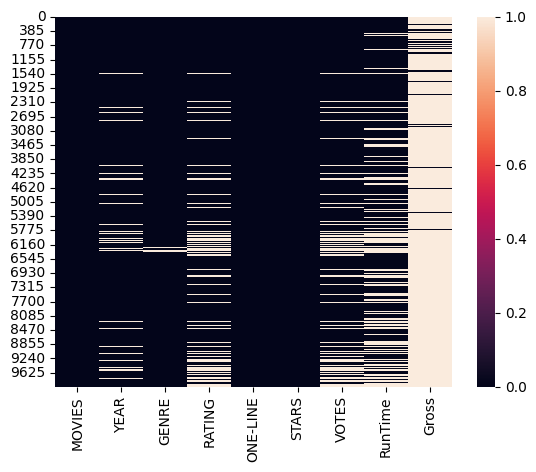

In [144]:
sns.heatmap(netflix.isnull())

In [147]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [ ]:
#por columna

In [152]:
netflix_curado.drop_duplicates(keep="first", inplace=True)

In [153]:
netflix_curado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9568 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9568 non-null   object 
 1   YEAR      9026 non-null   object 
 2   GENRE     9490 non-null   object 
 3   RATING    8168 non-null   float64
 4   ONE-LINE  9568 non-null   object 
 5   STARS     9568 non-null   object 
 6   VOTES     8168 non-null   object 
 7   RunTime   7008 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 747.5+ KB


<Axes: >

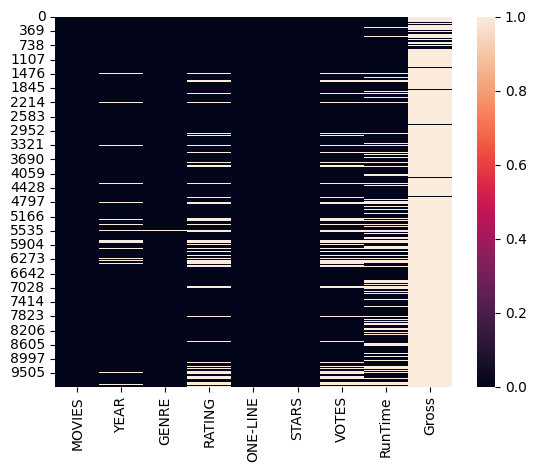

In [154]:
sns.heatmap(netflix_curado.isnull())

In [ ]:
#ARRANCAMOS A CURAR POR COLUMNA

In [165]:
netflix_curado.MOVIES.value_counts()

,count
MOVIES,
Bleach: Burîchi,65
Avatar: The Last Airbender,61
La Reina de Indias y el Conquistador,60
Dexter,48
The Drew Barrymore Show,45
...,...
#Realityhigh,1
Eobiseu,1
Desenfrenadas,1


In [ ]:
#lo que vamos a hacer es , cambiar el nombre de "movies" a titulos
#hacer otra columna con "tipo" que diga serie o pelicula
#dos columnas, año de inicio año de finalizacion
#ponemos nan si aun no termino
#todas las que string que tienen \n, cambiamos esos caracteres
#stars lo dividimos en dos, una de directores y una de actores
#cambiamos votes a floats
#gross lo buscamos y runtime tambien